<a href="https://colab.research.google.com/github/binit24/Datascience-projects/blob/main/USA_Covid_Dataset_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
f = open("covid.csv")

In [67]:
#Reading the Dataset:
df = pd.read_csv('covid.csv')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(58, 18)


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [68]:
#Checking datatypes:
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [69]:
#Checking for categorical columns:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print("Categorical Columns:",cat_col)

Categorical Columns: ['Province_State', 'Country_Region', 'Last_Update', 'ISO3']


In [70]:
#Checking the value count and unique value of each categorical feature:
for col in df.columns:
    if df[col].dtypes == object:
        print(str(col)+':'+str(df[col].unique()))
        print(df[col].value_counts())
        print('********************************************')

Province_State:['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']
Guam                        1
North Dakota                1
New Jersey                  1
Wisconsin                   1
South Carolina              1
North Carolina              1
Iowa                        1
Missouri                    1
Diamond Princess    

                      Total Missing Value
Province_State                          0
Country_Region                          0
Last_Update                             0
Lat                                     2
Long_                                   2
Confirmed                               0
Deaths                                  0
Recovered                              16
Active                                  0
FIPS                                    0
Incident_Rate                           2
People_Tested                           2
People_Hospitalized                    25
Mortality_Rate                          1
UID                                     0
ISO3                                    0
Testing_Rate                            2
Hospitalization_Rate                   25


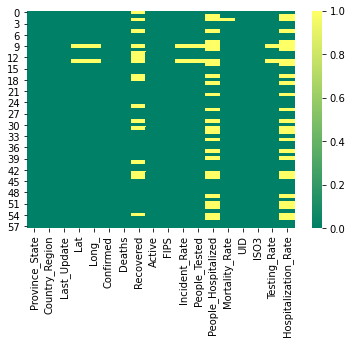

In [71]:
#Checking the null values in the dataset:
missing_value = pd.DataFrame(df.isnull().sum(),columns=['Total Missing Value'])
print(missing_value)
sns.heatmap(df.isnull(),cmap='summer')

In [72]:
#We can see there are some missing values present in dataset he we have to normalize them.

In [73]:
#we will use simple imputer function from sklearn to remove null values:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
for col in['Recovered','People_Hospitalized','Hospitalization_Rate','Incident_Rate','Mortality_Rate','Testing_Rate','People_Tested']:
  df[col] = imp.fit_transform(df[col].values.reshape(-1,1))

In [74]:
#Dropping Unnecessary Columns:
df.drop(columns=['Lat','Long_'],axis=1,inplace=True)

Are There Missing Data? : False


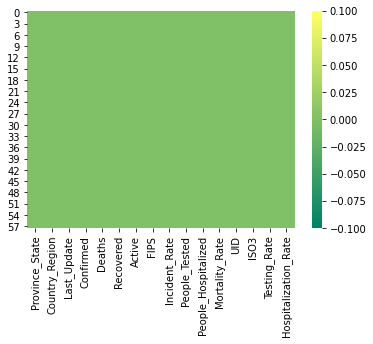

In [75]:
#Now again checking for missing values:
print("Are There Missing Data? :",df.isnull().any().any())
sns.heatmap(df.isnull(),cmap='summer')

In [76]:
#checking the Columns:
columns = list(df.columns)
print(df.shape)
print(columns)

(58, 16)
['Province_State', 'Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate', 'Hospitalization_Rate']


In [77]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df.describe()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000
mean,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.116191,2.378302e+07,1898.951207,3.781861
min,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,8.400001e+07,2741.843521,12.829963
50%,10148.500000,385.000000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.409323,8.400003e+07,3501.526835,14.342541
75%,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,8.400004e+07,4622.586404,15.552021
max,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [78]:
#Avg confirmed cases is 26756.086
#Avg no of Deaths is around 1611
#Avg active cases 20070.72
#Avg mortality rate is 4.458248
#Avg Testing rate is 3894.186870
#There is possibility of presence of outliers as mean of some features are greater than median.
#In some of features theres an huge difference between 75% and max which confirm the presence of outliers.

In [79]:
#Exploratory Data Analysis

#.Univarite Analysis

#.Multivariate Analysis

#.Bivariate Analysis

#.Here we check the relationship between different independant and dependant variable

In [80]:
#Univariate Analysis:
#Checking the total deaths cases:
df['Deaths'].sum()

93439

   Province_State  Recovered
0        New York    61886.0
1           Texas    30341.0
2        Michigan    28234.0
3       Louisiana    26249.0
4      New Jersey    23945.0
5       Minnesota    12227.0
6       Tennessee    11783.0
7  North Carolina    11637.0
8            Iowa     8362.0
9       Wisconsin     7728.0


Text(0.5, 1.0, 'Top 10 sates with highest recoverd cases')

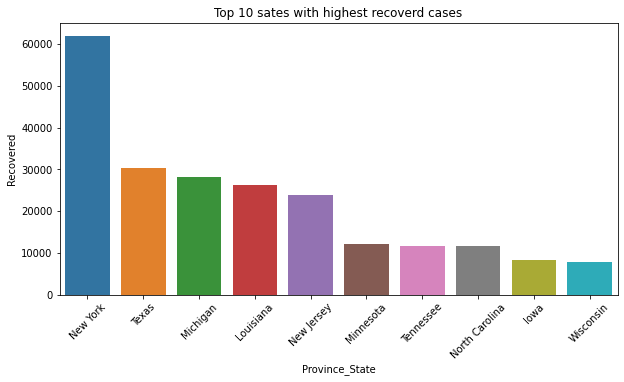

In [81]:
#Bivariate Analysis:
#Checking top 10 sates with highest recoverd cases:
top_10 = df.groupby(by ='Province_State')['Recovered'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_10)
# Visualizing by bar plot:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Province_State'],top_10['Recovered'])
plt.xlabel('Province_State')
plt.ylabel('Recovered')
plt.title('Top 10 sates with highest recoverd cases')

Text(0, 0.5, 'Deaths')

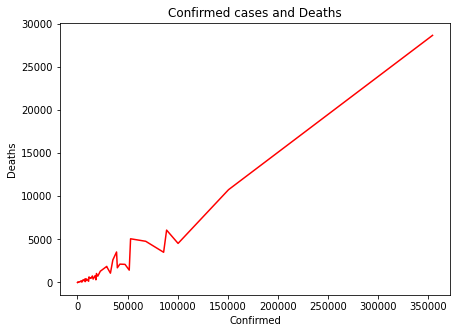

In [82]:
# Bivariate Analysis Linear regression with marginal distributions
# Checking the relation Bewtween Confirmed cases and Deaths
plt.figure(figsize=(7,5))
sns.lineplot(x="Confirmed", y="Deaths", data=df,color='red')
plt.xlabel('Confirmed')
plt.title("Confirmed cases and Deaths")
plt.ylabel('Deaths')

In [83]:
#With increase in confirmed Cases Deaths is also incresing.

Text(0, 0.5, 'Deaths')

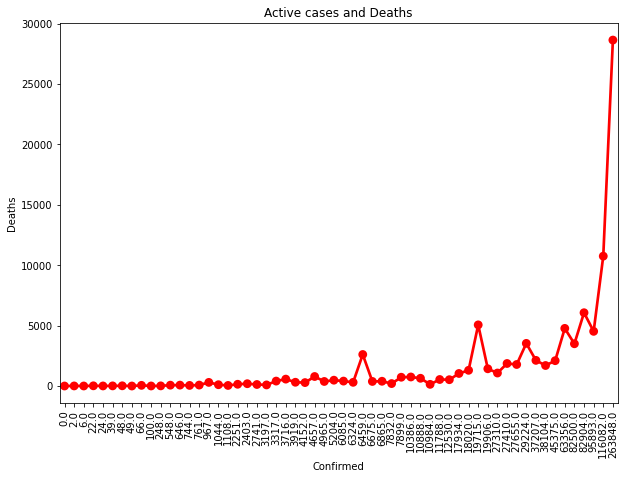

In [84]:
# Bivariate Analysis Linear regression with marginal distributions
# Checking the relation Bewtween Active cases and Deaths
plt.figure(figsize=(10,7))
sns.pointplot(x="Active", y="Deaths", data=df,color='red')
plt.xlabel('Confirmed')
plt.xticks(rotation=90)
plt.title("Active cases and Deaths")
plt.ylabel('Deaths')

In [85]:
#With increase in Active Cases Death rate is also increasing.

             Province_State  Testing_Rate
0              Rhode Island  11377.424693
1              North Dakota   7768.396797
2                  New York   7740.670204
3             Massachusetts   7108.491647
4  Northern Mariana Islands   6921.877267
5                New Mexico   6783.862680
6                 Louisiana   6151.487891
7                New Jersey   5982.117023
8      District of Columbia   5727.106946
9                      Utah   5604.065930


Text(0.5, 1.0, 'Top 10 sates with highest Testing Rates')

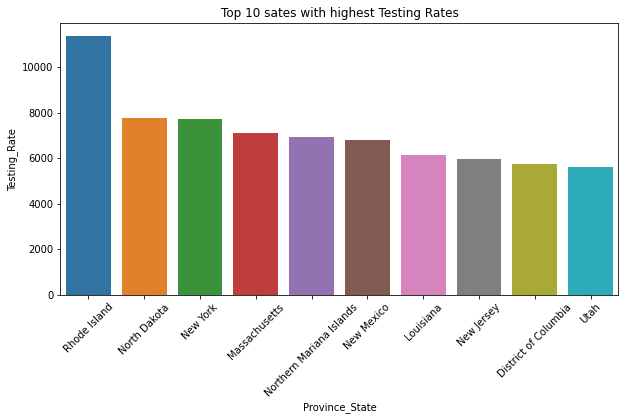

In [86]:
#Bivariate Analysis:
#Checking top 10 sates with highest Testing Rates:
top_10 = df.groupby(by ='Province_State')['Testing_Rate'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_10)
# Visualizing by bar plot:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Province_State'],top_10['Testing_Rate'])
plt.xlabel('Province_State')
plt.ylabel('Testing_Rate')
plt.title('Top 10 sates with highest Testing Rates')

  Province_State    Active
0       New York  263848.0
1     New Jersey  116082.0
2       Illinois   95893.0
3  Massachusetts   82904.0
4     California   82500.0
5   Pennsylvania   63356.0
6        Florida   45375.0
7        Georgia   38104.0
8       Maryland   37207.0
9    Connecticut   29224.0


Text(0.5, 1.0, 'Top 10 sates with highest Active cases')

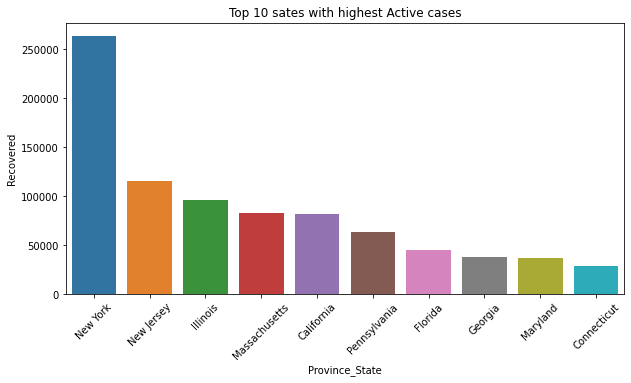

In [87]:
#Bivariate Analysis:
#Checking top 10 sates with highest Active Cases:
top_10 = df.groupby(by ='Province_State')['Active'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_10)
# Visualizing by bar plot:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Province_State'],top_10['Active'])
plt.xlabel('Province_State')
plt.ylabel('Recovered')
plt.title('Top 10 sates with highest Active cases')

In [88]:
#Checking State wise total confirmed and Recovered and Deaths Cases.
df.groupby('Province_State')['Confirmed','Recovered','Deaths'].sum().sort_values(ascending=False,by='Deaths').reset_index().head(10)

,Province_State,Confirmed,Recovered,Deaths
0,New York,354370,61886.000000,28636
1,New Jersey,150776,23945.000000,10749
2,Massachusetts,88970,7007.428571,6066
3,Michigan,53009,28234.000000,5060
4,Pennsylvania,68126,7007.428571,4770
5,Illinois,100418,7007.428571,4525
6,Connecticut,39017,6264.000000,3529
7,California,85997,7007.428571,3497
8,Louisiana,35316,26249.000000,2608
9,Maryland,42323,2993.000000,2123


  Province_State  Deaths
0       New York   28636
1     New Jersey   10749
2  Massachusetts    6066
3       Michigan    5060
4   Pennsylvania    4770
5       Illinois    4525
6    Connecticut    3529
7     California    3497
8      Louisiana    2608
9       Maryland    2123


Text(0.5, 1.0, 'Top 10 sates with highest Deaths')

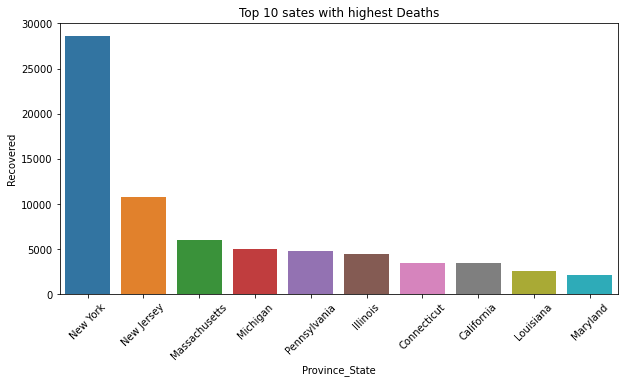

In [89]:
#Bivariate Analysis:
#Checking top 10 sates with highest Deaths:
top_10 = df.groupby(by ='Province_State')['Deaths'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_10)
# Visualizing by bar plot:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Province_State'],top_10['Deaths'])
plt.xlabel('Province_State')
plt.ylabel('Recovered')
plt.title('Top 10 sates with highest Deaths')

In [90]:
#Checking no of confirmed Active and Deaths cases on Newyork:
new_york = df.loc[df['Province_State'] == 'New York']
new_york.groupby(by='Confirmed')['Active','Deaths'].sum().head().reset_index()

,Confirmed,Active,Deaths
0,354370,263848.0,28636


In [91]:
#Checking no of confirmed Active and Deaths cases on New Jersey:
New_Jersey = df.loc[df['Province_State'] == 'New Jersey']
New_Jersey.groupby(by='Confirmed')['Active','Deaths'].sum().head().reset_index()

,Confirmed,Active,Deaths
0,150776,116082.0,10749


In [92]:
#Checking no of confirmed Active and Deaths cases on California:
california = df.loc[df['Province_State'] == 'California']
california.groupby(by='Confirmed')['Active','Deaths'].sum().head().reset_index()

,Confirmed,Active,Deaths
0,85997,82500.0,3497


In [93]:
#Checking no of confirmed Active and Deaths cases on Indiana:
indiana = df.loc[df['Province_State'] == 'Indiana']
indiana.groupby(by='Confirmed')['Active','Deaths'].sum().head().reset_index()

,Confirmed,Active,Deaths
0,29274,27410.0,1864


             Province_State  Mortality_Rate
0                  Michigan        9.545549
1  Northern Mariana Islands        9.523810
2               Connecticut        9.044775
3            Virgin Islands        8.695652
4                  New York        8.080819
5                 Louisiana        7.384755
6                New Jersey        7.129119
7              Pennsylvania        7.001732
8             Massachusetts        6.818029
9                   Indiana        6.367425


Text(0.5, 1.0, 'Top 10 states highest Mortality_Rate')

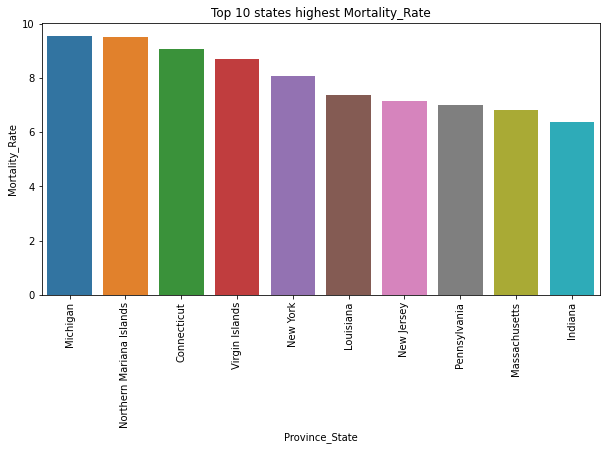

In [94]:
#Bivariate Analysis:
#Checking top 10 states with highest Mortality_Rate:
top_10 = df.groupby(by ='Province_State')['Mortality_Rate'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_10)
# Visualizing by bar plot:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(top_10['Province_State'],top_10['Mortality_Rate'])
plt.xlabel('Province_State')
plt.ylabel('Mortality_Rate')
plt.title('Top 10 states highest Mortality_Rate')

In [95]:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.

In [96]:
#Handling Categorical Data One can find many ways to handle categorical data. Some of them categorical data are,

#Nominal data : data are not in any order : OneHotEncoder is used in this case

#Ordinal data : data are in order : LabelEncoder is used in this case

In [97]:
df.drop(columns=['Last_Update','Country_Region','ISO3'],axis=1,inplace=True)

In [98]:
df["Province_State"].value_counts().sort_values(ascending = True).head()

Guam          1
Louisiana     1
Oklahoma      1
New Mexico    1
Oregon        1
Name: Province_State, dtype: int64

In [99]:
#using Label Encoder to convert Categorical data into neumeric:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ["Province_State"]
for col in columns:
    df[col] = le.fit_transform(df[col])

In [100]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.
print(df.skew())
print("Skewed features: ",len(df.skew().loc[abs(df.skew())>0.55]))

Province_State          0.000000
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
UID                    -3.027480
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64
Skewed features:  11


In [101]:
import scipy.stats as stat
import pylab

In [102]:
#If you want to check whether feature is guassian or normal distributed
# Q-Q plot is used to check wheather the data are normally distributed or not by graphically.
def plot_data(df,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

<Figure size 360x360 with 0 Axes>

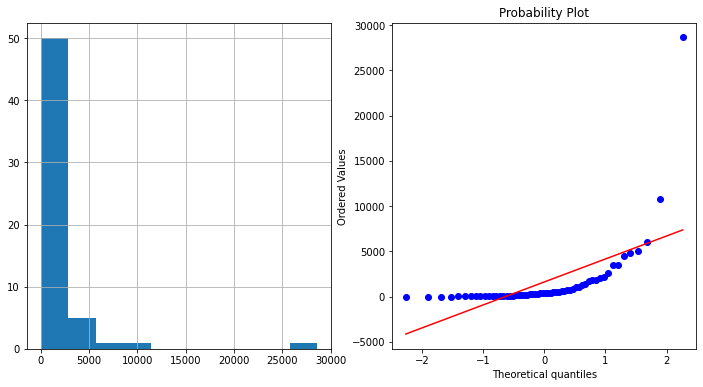

In [103]:
#Checking distribution of Target class:
plt.figure(figsize=(5,5))
plot_data(df,'Deaths')

<Figure size 360x360 with 0 Axes>

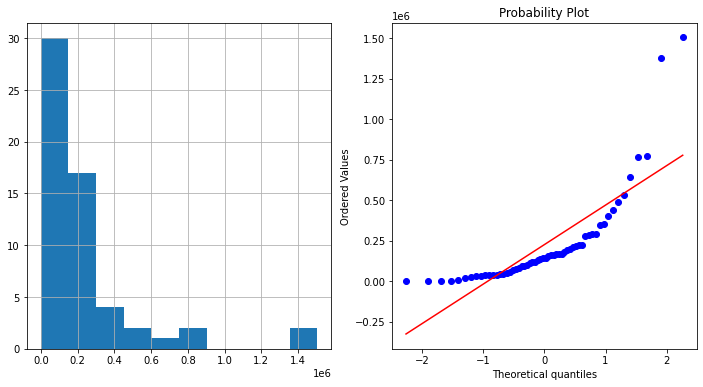

In [104]:
#Checking Distribution of People Tested:
plt.figure(figsize=(5,5))
plot_data(df,'People_Tested')

In [105]:
# We can clearly see data points are not been normally distributed.
for col in df.columns:
        if df.skew().loc[col]>0.55:
            df[col] = np.log1p(df[col])

In [106]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.

In [107]:
#Let check wheather any outliers are present or not:
from scipy.stats import zscore
zscore = abs(zscore(df))
print("Before removal of outliers:",df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df_final.shape)

Before removal of outliers: (58, 13)
After removal of outliers: (51, 13)


In [108]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_final.drop('Deaths',axis=1)
y = df_final['Deaths']
print('shape of X is {}'.format(X.shape))
print('shape of y is {}'.format(y.shape))

shape of X is (51, 12)
shape of y is (51,)


In [109]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
print(X_train.shape,'\t',X_test.shape)

(40, 12) 	 (11, 12)


In [111]:
print(y_train.shape,'\t',y_test.shape)

(40,) 	 (11,)


In [112]:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.
corrmat = X_train.corr()

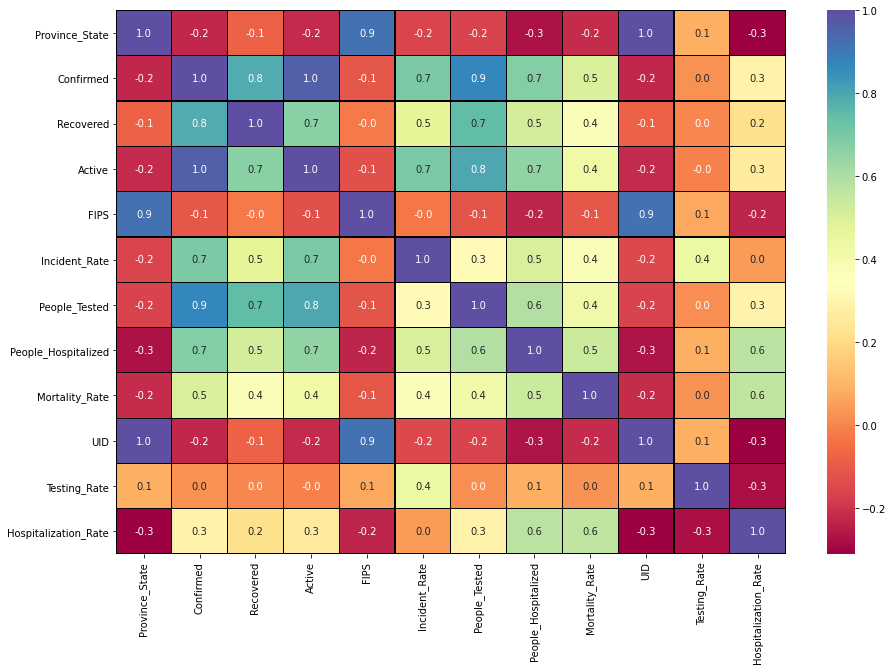

In [113]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(corrmat,annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

In [114]:
#Here we can see that some of the features are highly corealted with each hence these both feature will act as same.
#so as these features are highly corelated with each other they can behave as duplicate feature.
#Lets define a function and set a minimum threshold value to tackle the highly corelated feature:
def get_corelations(data, threshold):
    corr_col = set()  
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

Text(0.5, 1.0, 'corelation with target variable')

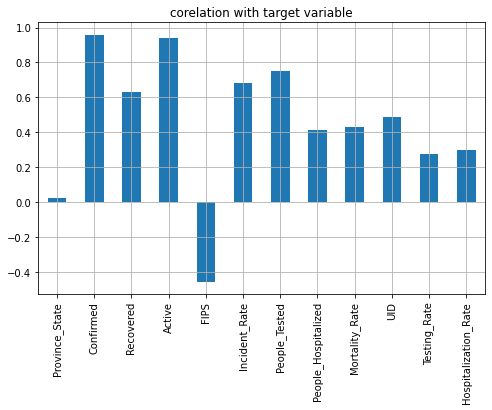

In [115]:
#corelation with target column:
plt.figure(figsize=(8,5))
df.drop('Deaths',axis=1).corrwith(df['Deaths']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('corelation with target variable')

In [116]:
corr_features = get_corelations(X_train, 0.85)
len(set(corr_features))

4

In [117]:
#Dropping the highly corelated columns:
X_train_uncorr = X_train.drop(labels=corr_features,axis=1)
X_test_uncorr =  X_test.drop(labels=corr_features,axis=1)

In [118]:
X_train_uncorr.shape, X_test_uncorr.shape

((40, 8), (11, 8))

In [119]:
#Redefining traing and testing data:
X_train_uncorr, X_test_uncorr, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [120]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution where mean = 0 and SD(+-)1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_uncorr)
X_train_uncorr = scaler.transform(X_train_uncorr)
X_test_uncorr = scaler.transform(X_test_uncorr)

In [121]:
#Importing the Model for Predictions Process:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#Import Error Metrics:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [122]:
model = [LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
for m in model:
    m.fit(X_train_uncorr,y_train)
    print("Score of",m, "is:",m.score(X_train_uncorr,y_train))
    y_predict = m.predict(X_test_uncorr)
    print("Error:")
    print('Mean absolute error:',mean_absolute_error(y_test,y_predict))
    print('Mean squared error:',mean_squared_error(y_test,y_predict))
    print('Root mean squared is ',np.sqrt(mean_squared_error(y_test,y_predict)))
    print('r2 score is:',r2_score(y_test,y_predict))
    print('******************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.9939199190549102
Error:
Mean absolute error: 0.094208808718196
Mean squared error: 0.010796990570187853
Root mean squared is  0.1039085683194021
r2 score is: 0.9965437135267035
******************************************************************


Score of Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) is: 0.5853555114331302
Error:
Mean absolute error: 0.8825091542149758
Mean squared error: 1.4587329707406127
Root mean squared is  1.207780183121338
r2 score is: 0.5330366362601381
******************************************************************


Score of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) is: 0.9930833041393307
Error:
Mean absolute error: 0.11061251

In [123]:
#We are getting Max R2 Score with linear Regression Lets Implement It with Cross Validation:

In [124]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [125]:
#Lets do cross Validation and check the mean r2 score.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").std())

mean r2_score for Linear Regression: 0.9842910306941871
standard deviation in r2_score for linear Regression: 0.01075598970849752


In [126]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.09420880860577094
MSE: 0.010796990542966959
RMSE: 0.10390856818841726


In [127]:
#Saving the best Model for future predictions:
import joblib
joblib.dump(lr,'lr.obj')
lr_from_joblib = joblib.load('lr.obj')
lr_from_joblib.predict(X_test)

array([ 7.13365606,  5.87687773,  6.86933905,  4.27699993,  6.18318987,
        5.59299928,  5.96971328, 10.28731586,  4.73621291,  9.15072385,
        8.30525778])